# Figure 2

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

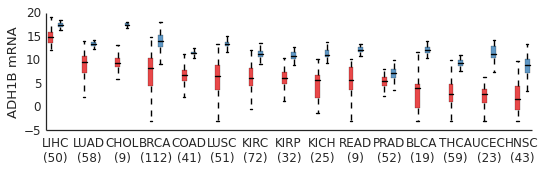

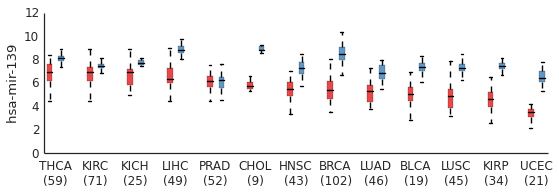

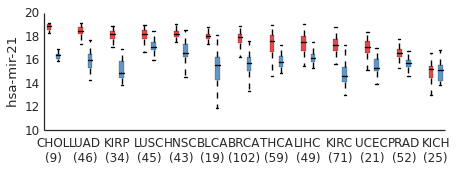

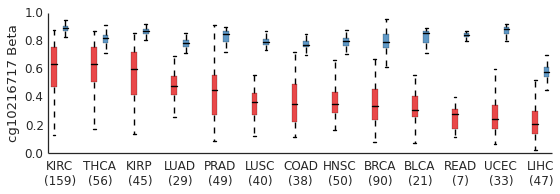

In [1]:
import NotebookImport
from DX_screen import *

In [2]:
cd ../DX/Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [4]:
from Imports import *
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


Pull in log-hazard ratios from stratified pan-cancer survival screen

In [7]:
pwd

u'/cellar/users/agross/TCGA_Code/DX/Notebooks'

In [8]:
pancan_haz = pd.read_csv('r_pancan.csv', header=None, 
                         index_col=0, squeeze=True)

RNA proliferation signature

In [9]:
rna_sig = pd.read_csv('/cellar/users/agross/TCGA_Code/DX/rna_signature.csv',
                      index_col=[0,1], header=None, squeeze=True)
rna_sig = rna_sig[:,1]
rna_sig.index.name = ''

In [25]:
gene_corr = rna_df.xs('01',1,1).ix[:, rna_sig.index].T.corrwith(rna_sig)

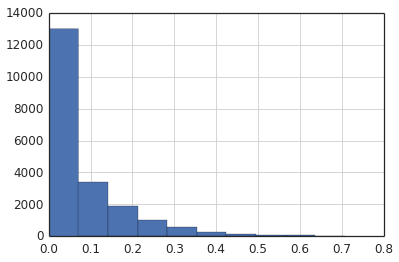

In [44]:
(gene_corr ** 2).hist()

In [72]:
rr = screen_feature(corr.mean(1).order().dropna(), rev_kruskal, gs2.T, align=False)
v = corr.mean(1).order().dropna()
fp = (1.*gene_sets.T * v).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

In [82]:
rr.ix[ti(fp > 0)].join(fp).sort('p').head()

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_CELL_CYCLE,367.75,5.78e-82,7.69e-79,0.19
REACTOME_CELL_CYCLE_MITOTIC,316.71,7.54e-71,5.01e-68,0.21
REACTOME_METABOLISM_OF_RNA,289.94,5.12e-65,2.27e-62,0.16
REACTOME_DNA_REPLICATION,287.56,1.69e-64,5.63e-62,0.27
REACTOME_MITOTIC_M_M_G1_PHASES,255.75,1.45e-57,3.86e-55,0.27


In [79]:
rr.ix[ti(fp < 0)].join(fp).sort('p').head()

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,73.73,8.96e-18,1.78e-16,-0.07
KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION,58.17,2.41e-14,3.64e-13,-0.07
KEGG_CALCIUM_SIGNALING_PATHWAY,53.24,2.96e-13,4.14e-12,-0.08
REACTOME_NEURONAL_SYSTEM,47.92,4.44e-12,6.08e-11,-0.06
REACTOME_GPCR_DOWNSTREAM_SIGNALING,41.35,1.28e-10,1.53e-09,-0.03


In [36]:
cc = codes.ix[rna_sig.index].dropna().unique()
corr = {}
for c in cc:
    pts = ti(codes == c)
    corr[c] = rna_df.xs('01',1,1).ix[:, pts].T.corrwith(rna_sig.ix[pts])
corr = pd.DataFrame(corr)

In [ ]:
fig, ax = subplots(figsize=(6,4))
(corr ** 2).mean().order().plot(kind='bar', ax=ax)
ax.set_ylabel('Mean $R^2$')
prettify_ax(ax)
fig.savefig('/cellar/users/agross/Desktop/Figures/mev.png', dpi=300)

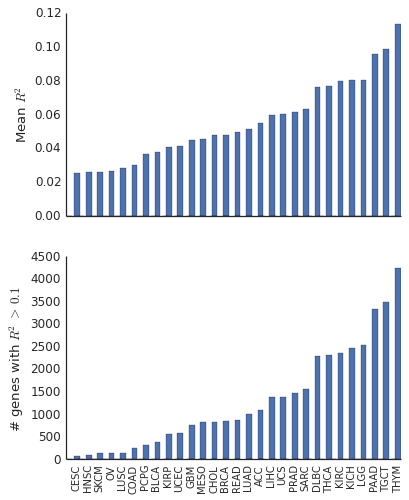

In [84]:
fig, axs = subplots(2,1, figsize=(6,8), sharex=True)
ax = axs[0]
(corr ** 2).mean().order().plot(kind='bar', ax=ax)
ax.set_ylabel('Mean $R^2$')
prettify_ax(ax)

ax = axs[1]
((corr ** 2) > .2).sum().order().plot(kind='bar', ax=ax)
ax.set_ylabel('# genes with $R^2 > \, 0.1$')
prettify_ax(ax)
fig.savefig('/cellar/users/agross/Desktop/Figures/mev.png', dpi=300)

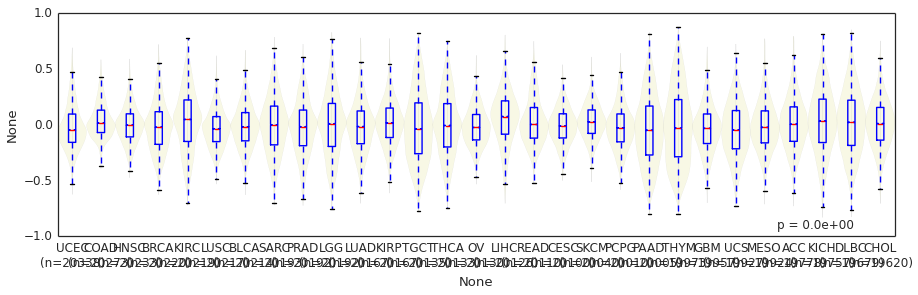

In [41]:
fig, ax = subplots(figsize=(15,4))
violin_plot_series(corr.stack(), ax=ax)